In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
import itertools
from sklearn.metrics import precision_recall_curve

In [ ]:
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt

In [ ]:
nw_plants = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project/Data Stuff/nw_plants.csv')

In [ ]:
nw_plants.describe()

,Unnamed: 0,Unnamed: 0.1,index,id,main_species_id,year,genus_id,main_species.id,main_species.year,main_species.genus_id,main_species.fruit_or_seed.shape,main_species.specifications.average_height.cm,main_species.specifications.maximum_height.cm,main_species.growth.days_to_harvest,main_species.growth.row_spacing.cm,main_species.growth.spread.cm,main_species.growth.ph_maximum,main_species.growth.ph_minimum,main_species.growth.light,main_species.growth.atmospheric_humidity,main_species.growth.growth_months,main_species.growth.fruit_months,main_species.growth.minimum_precipitation.mm,main_species.growth.maximum_precipitation.mm,main_species.growth.minimum_root_depth.cm,main_species.growth.minimum_temperature.deg_f,main_species.growth.minimum_temperature.deg_c,main_species.growth.maximum_temperature.deg_f,main_species.growth.maximum_temperature.deg_c,main_species.growth.soil_nutriments,main_species.growth.soil_salinity,main_species.growth.soil_texture,main_species.growth.soil_humidity,genus.id,family.id,main_species
count,5373.000000,5373.000000,1452.0,5373.000000,5.369000e+03,5229.000000,5280.000000,5.280000e+03,5229.000000,5280.000000,0.0,980.000000,972.000000,2.000000,12.000000,10.000000,1532.000000,1532.000000,834.000000,829.000000,0.0,0.0,902.000000,902.000000,912.000000,917.000000,917.000000,3.000000,3.000000,832.000000,833.000000,833.000000,2.000000,5373.000000,5373.000000,0.0
mean,2686.000000,196.059185,0.0,173328.334822,3.006066e+05,1875.441193,2888.054924,2.931099e+05,1875.441193,2888.054924,NaN,332.925510,359.724280,57.500000,22.166667,53.200000,7.399347,5.937990,7.330935,5.841978,NaN,NaN,435.721729,1240.761641,31.745614,-21.087241,-29.486369,89.000000,31.666667,5.292067,0.354142,2.927971,2.500000,2887.844593,107.465476,NaN
std,1551.195829,388.984440,0.0,100364.513253,3.442175e+05,73.989449,2657.404981,3.358916e+05,73.989449,2657.404981,NaN,853.448157,979.213207,24.748737,21.251025,28.502631,0.849297,0.949017,1.237985,1.903562,NaN,NaN,242.822341,726.700780,18.892700,21.600659,12.037019,5.196152,2.886751,1.905097,1.324024,1.289603,0.707107,2656.346941,163.047095,NaN
min,0.000000,0.000000,0.0,95493.000000,1.011260e+05,1753.000000,3.000000,1.011260e+05,1753.000000,3.000000,NaN,3.000000,3.000000,40.000000,2.000000,10.000000,4.000000,3.000000,2.000000,1.000000,NaN,NaN,50.000000,279.000000,0.000000,-76.000000,-60.000000,86.000000,30.000000,1.000000,0.000000,1.000000,2.000000,3.000000,1.000000,NaN
25%,1343.000000,0.000000,0.0,117776.000000,1.310900e+05,1827.000000,1169.500000,1.305048e+05,1827.000000,1169.500000,NaN,45.000000,45.000000,48.750000,8.750000,33.000000,7.000000,5.200000,7.000000,4.000000,NaN,NaN,254.000000,711.000000,20.000000,-31.000000,-35.000000,86.000000,30.000000,4.000000,0.000000,2.000000,2.250000,1165.000000,13.000000,NaN
50%,2686.000000,0.000000,0.0,145533.000000,1.588130e+05,1876.000000,2266.000000,1.584315e+05,1876.000000,2266.000000,NaN,91.000000,91.000000,57.500000,17.500000,45.000000,7.500000,6.000000,8.000000,5.000000,NaN,NaN,355.000000,1270.000000,30.000000,-31.000000,-35.000000,86.000000,30.000000,6.000000,0.000000,3.000000,2.500000,2265.000000,26.000000,NaN
75%,4029.000000,108.000000,0.0,173773.000000,1.872510e+05,1917.000000,4264.000000,1.863485e+05,1917.000000,4264.000000,NaN,179.750000,182.000000,66.250000,30.000000,82.500000,8.000000,7.000000,8.000000,8.000000,NaN,NaN,508.000000,1524.000000,35.000000,-13.000000,-25.000000,90.500000,32.500000,7.000000,0.000000,4.000000,2.750000,4298.000000,117.000000,NaN
max,5372.000000,1451.000000,0.0,617088.000000,1.261870e+06,2018.000000,43701.000000,1.261870e+06,2018.000000,43701.000000,NaN,7010.000000,11550.000000,75.000000,76.000000,90.000000,10.000000,8.000000,9.000000,9.000000,NaN,NaN,1625.000000,7010.000000,152.000000,51.000000,11.000000,95.000000,35.000000,9.000000,9.000000,9.000000,3.000000,43701.000000,792.000000,NaN


In [ ]:
nw_plants = nw_plants.rename(columns={
    'main_species.foliage.texture' :"Foliage Texture",
    'main_species.specifications.average_height.cm' : 'Avg Height (cm)',
    'main_species.growth.minimum_temperature.deg_f': 'Minimum Temp (F)',
    'main_species.growth.minimum_precipitation.mm' : 'Minimum Precipitation (mm)',
    'main_species.growth.light' : 'Amt of Light',
    'main_species.growth.atmospheric_humidity' : "Amt of Humidity"
})

## Model Selection for K-Nearest Classification

In [ ]:
# calculate estimate of test error for a given feature set
def get_acc_error(features):
  all = features.copy()
  all.append('Foliage Texture')
  df_short = nw_plants[all].dropna()

  df_train, df_test = train_test_split(df_short, test_size=0.2)

  X_train = df_train[features]
  y_train = df_train['Foliage Texture']

  X_test = df_test[features]
  y_test_true = df_test['Foliage Texture']

  # define pipeline
  pipeline = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=10)
)
  # calculate errors from cross-validation
  pipeline.fit(X_train, y_train)
  y_test_predict = pipeline.predict(X_test)
  acc_score = accuracy_score(y_test_true, y_test_predict)

  coarse_tup = (precision_score(y_test_true =='coarse', y_test_predict=='coarse'),
 recall_score(y_test_true=='coarse', y_test_predict=='coarse'))
  
  med_tup = (precision_score(y_test_true=='medium', y_test_predict=='medium'),
 recall_score(y_test_true=='medium', y_test_predict=='medium'))
  
  fine_tup = (precision_score(y_test_true=='fine', y_test_predict=='fine'),
 recall_score(y_test_true=='fine', y_test_predict=='fine'))
  
  res = {}

  res['acc'] = acc_score
  res['coarse'] = coarse_tup
  res['med'] = med_tup
  res['fine'] = fine_tup
  res['length'] = len(df_short)
  # calculate average of the cross-validation errors
  return res

In [ ]:
# variables tested in model

avg_height = 'Avg Height (cm)'
min_temp = 'Minimum Temp (F)'
min_prec = 'Minimum Precipitation (mm)'
light = 'Amt of Light'
humidity = "Amt of Humidity"

In [ ]:
# get all 5 choose 3 combinations of the variables above

feat_list = [avg_height, min_temp, min_prec, light, humidity]
combs = list(itertools.combinations(feat_list, 3))

In [ ]:
combs

[('Avg Height (cm)', 'Minimum Temp (F)', 'Minimum Precipitation (mm)'),
 ('Avg Height (cm)', 'Minimum Temp (F)', 'Amt of Light'),
 ('Avg Height (cm)', 'Minimum Temp (F)', 'Amt of Humidity'),
 ('Avg Height (cm)', 'Minimum Precipitation (mm)', 'Amt of Light'),
 ('Avg Height (cm)', 'Minimum Precipitation (mm)', 'Amt of Humidity'),
 ('Avg Height (cm)', 'Amt of Light', 'Amt of Humidity'),
 ('Minimum Temp (F)', 'Minimum Precipitation (mm)', 'Amt of Light'),
 ('Minimum Temp (F)', 'Minimum Precipitation (mm)', 'Amt of Humidity'),
 ('Minimum Temp (F)', 'Amt of Light', 'Amt of Humidity'),
 ('Minimum Precipitation (mm)', 'Amt of Light', 'Amt of Humidity')]

In [ ]:
final_df = pd.DataFrame()

In [ ]:
# testing different combinations of variables to find best accuracy, precision, and recall

for i in range(len(combs)):
  features = list(combs[i])
  series = pd.Series(get_acc_error(features))
  final_df[str(combs[i])] = series

ml_table = final_df.transpose()

In [ ]:
ml_table.sort_values(by="acc", ascending=False)

,acc,coarse,med,fine,length
"('Avg Height (cm)', 'Minimum Temp (F)', 'Amt of Humidity')",0.52381,"(0.5833333333333334, 0.4666666666666667)","(0.5333333333333333, 0.5)","(0.4666666666666667, 0.6363636363636364)",207
"('Avg Height (cm)', 'Amt of Light', 'Amt of Humidity')",0.428571,"(0.45454545454545453, 0.38461538461538464)","(0.5, 0.375)","(0.3684210526315789, 0.5384615384615384)",208
"('Avg Height (cm)', 'Minimum Temp (F)', 'Amt of Light')",0.404762,"(0.47058823529411764, 0.6666666666666666)","(0.125, 0.07692307692307693)","(0.47058823529411764, 0.47058823529411764)",209
"('Minimum Precipitation (mm)', 'Amt of Light', 'Amt of Humidity')",0.404762,"(0.2857142857142857, 0.46153846153846156)","(0.42857142857142855, 0.46153846153846156)","(0.7142857142857143, 0.3125)",206
"('Avg Height (cm)', 'Minimum Precipitation (mm)', 'Amt of Light')",0.390244,"(0.3125, 0.35714285714285715)","(0.4166666666666667, 0.29411764705882354)","(0.46153846153846156, 0.6)",201
"('Avg Height (cm)', 'Minimum Temp (F)', 'Minimum Precipitation (mm)')",0.376404,"(0.2926829268292683, 0.2727272727272727)","(0.42045454545454547, 0.45121951219512196)","(0.3673469387755102, 0.34615384615384615)",886
"('Minimum Temp (F)', 'Minimum Precipitation (mm)', 'Amt of Humidity')",0.357143,"(0.35294117647058826, 0.4)","(0.23076923076923078, 0.42857142857142855)","(0.5, 0.3)",206
"('Avg Height (cm)', 'Minimum Precipitation (mm)', 'Amt of Humidity')",0.35,"(0.4117647058823529, 0.4117647058823529)","(0.2857142857142857, 0.36363636363636365)","(0.3333333333333333, 0.25)",199
"('Minimum Temp (F)', 'Minimum Precipitation (mm)', 'Amt of Light')",0.333333,"(0.23076923076923078, 0.21428571428571427)","(0.5833333333333334, 0.3888888888888889)","(0.23529411764705882, 0.4)",208
"('Minimum Temp (F)', 'Amt of Light', 'Amt of Humidity')",0.209302,"(0.2, 0.23076923076923078)","(0.09090909090909091, 0.08333333333333333)","(0.29411764705882354, 0.2777777777777778)",215


## Further Analysis of Highest Accuracy Model (Pre

In [ ]:
features = list(combs[2])
features

['Avg Height (cm)', 'Minimum Temp (F)', 'Amt of Humidity']

In [ ]:
df_short = nw_plants[['Foliage Texture', 'Avg Height (cm)', 'Minimum Temp (F)', 'Amt of Humidity']].dropna()
df_train, df_test = train_test_split(df_short, test_size=0.2)

In [ ]:
#going more in depth for '('Avg Height (cm)', 'Minimum Temp (F)', 'Amt of Humidity')' model
X_train = df_train[features]
y_train = df_train['Foliage Texture']

X_test = df_test[features]
y_test_true = df_test['Foliage Texture']

model = make_pipeline(
  StandardScaler(),
  KNeighborsClassifier(n_neighbors=10)
)

model.fit(X_train, y_train)
probas_ = model.predict_proba(X_test)

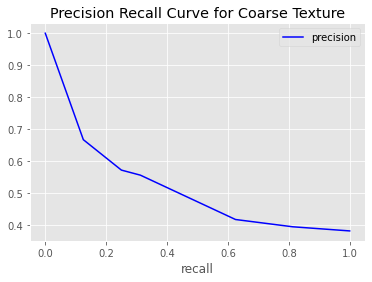

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(
    y_test_true == "coarse", probas_[:, 0]
)

pd.DataFrame({
    "precision": precisions,
    "recall": recalls
}).plot.line(x="recall", y="precision", title="Precision Recall Curve for Coarse Texture", color="blue")

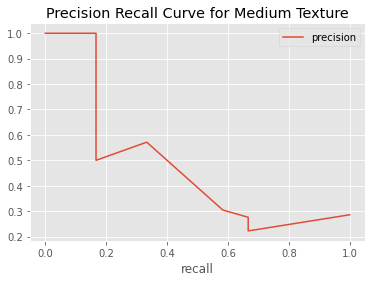

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(
    y_test_true == "medium", probas_[:, 1]
)

pd.DataFrame({
    "precision": precisions,
    "recall": recalls
}).plot.line(x="recall", y="precision", title="Precision Recall Curve for Medium Texture")

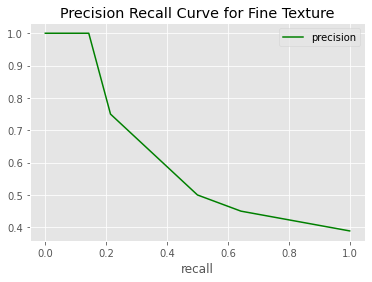

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(
    y_test_true == "fine", probas_[:, 2]
)

pd.DataFrame({
    "precision": precisions,
    "recall": recalls
}).plot.line(x="recall", y="precision", title="Precision Recall Curve for Fine Texture", color="green")